In [8]:
# Local installation for development
!pip install -e .. 

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/jesus/Workspace/research/code/ssl_simulator
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of ssl-simulator==0.1 from file:///home/jesus/Workspace/research/code/ssl_simulator (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for ssl-simulator

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import standard libraries
import os
import sys

# Third-Party Libraries
import numpy as np

# Import the Swarm Systems Lab Simulator
import ssl_simulator

from ssl_simulator import SimulationEngine
from ssl_simulator.data_manager import load_sim
from ssl_simulator.robot_models import SingleIntegrator, Unicycle2D
from ssl_simulator.controllers import ConstantSignal

# Import custom functions and classes
from visualization import PlotBasic

# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

In [2]:
dir(ssl_simulator)

['SimulationEngine',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'controllers',
 'createDir',
 'create_dir',
 'data_manager',
 'debug_eig',
 'get_idx',
 'gvf_trajectories',
 'load_data',
 'math',
 'network',
 'parse_kwargs',
 'robot_models',
 'scalar_fields',
 'visualization']

# Single integrator simulation

In [6]:
# Define the initial state
N = 5

p = np.array([np.random.random(N), np.random.random(N)]).T

x0 = [p]

# Controller settings
k = np.array([1,1])

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = ConstantSignal(k)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 1
simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 100/100 [00:00<00:00, 106589.68it/s]


time:  (101,)
p:  (101, 5, 2)
p_dot:  (101, 5, 2)
u:  (101, 1, 2)
k:  (101, 1, 2)


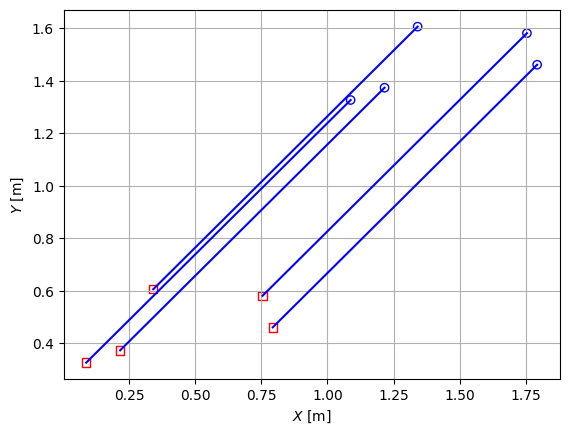

In [7]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()

# 2D Unicycle simulation

In [8]:
# Define the initial state
N = 5

p = np.array([np.random.random(N), np.random.random(N)]).T
speed = np.ones(N)
theta = np.random.random(N) * np.pi


x0 = [p, speed, theta]

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = Unicycle2D(x0)
controller = ConstantSignal(np.pi/4)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 1
simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 100/100 [00:00<00:00, 20099.21it/s]


time:  (101,)
p:  (101, 5, 2)
speed:  (101, 5)
theta:  (101, 5)
p_dot:  (101, 5, 2)
speed_dot:  (101, 5)
theta_dot:  (101, 5)
u:  (101, 1)
k:  (101, 1)


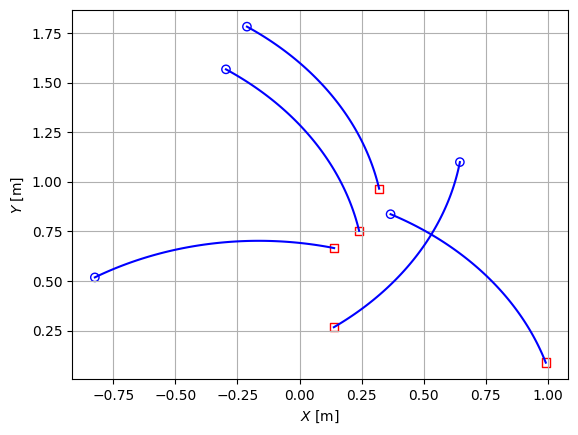

In [9]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()